<div style="padding: 20px; text-align: center; font-size: 32px; font-weight: bold;
            background: linear-gradient(to left, red, orange); 
            color: white; border-radius: 20px; 
            box-shadow: 0 0 10px rgba(0,0,0,0.2);">
            Peninjauan Kelayakan Penjualan Mobil
</div>

<span style="font-weight:bold; font-size:28px">Import Library</span>

In [89]:
 import pandas as pd
 import xgboost as xgb
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score
 import matplotlib.pyplot as plt
 import skfuzzy as fuzz
 from skfuzzy import control as ctrl
 import numpy as np

<span style="font-weight:bold; font-size:28px">Load Dataset</span>

In [90]:
df = pd.read_csv("D:/sampled_cleaned_car_prices.csv")
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2011,Chevrolet,Equinox,LTZ,SUV,automatic,2cnalfecxb6336309,il,3.0,64680.0,gray,black,ally,14650.0,14100.0,2015-02-26 02:00:00+08:00
1,2011,BMW,3 Series,328i xDrive,Sedan,automatic,wbapk5c57bf127600,nv,4.0,14505.0,blue,tan,financial services remarketing (lease),21900.0,21000.0,2015-01-22 06:30:00+08:00
2,2014,Chrysler,Town and Country,Touring,Minivan,automatic,2c4rc1bg9er255287,mi,5.0,20738.0,gold,black,hertz corporation/gdp,19350.0,20000.0,2015-02-19 01:30:00+08:00
3,2006,Subaru,B9 Tribeca,Limited 5-Passenger,SUV,automatic,4s4wx83c564409540,nc,3.0,133320.0,green,tan,primeritus remarketing/yem,6150.0,6700.0,2015-03-09 02:30:00+07:00
4,2005,Dodge,Stratus,SXT,Sedan,automatic,1b3el46x15n653909,pa,2.0,137046.0,silver,gray,credit acceptance corp/vrs/southfield,1375.0,1250.0,2015-02-10 01:30:00+08:00


<span style="font-weight:bold; font-size:28px">Analisis Dataset</span>

In [91]:
print(df.info())
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1500 non-null   int64  
 1   make          1500 non-null   object 
 2   model         1500 non-null   object 
 3   trim          1500 non-null   object 
 4   body          1500 non-null   object 
 5   transmission  1500 non-null   object 
 6   vin           1500 non-null   object 
 7   state         1500 non-null   object 
 8   condition     1500 non-null   float64
 9   odometer      1500 non-null   float64
 10  color         1500 non-null   object 
 11  interior      1500 non-null   object 
 12  seller        1500 non-null   object 
 13  mmr           1500 non-null   float64
 14  sellingprice  1500 non-null   float64
 15  saledate      1500 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 187.6+ KB
None


(1500, 16)

<span style="font-size:24px">Pre-processing data</span>

In [92]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

<span style="font-weight:bold; font-size:28px">Persebaran Data</span>

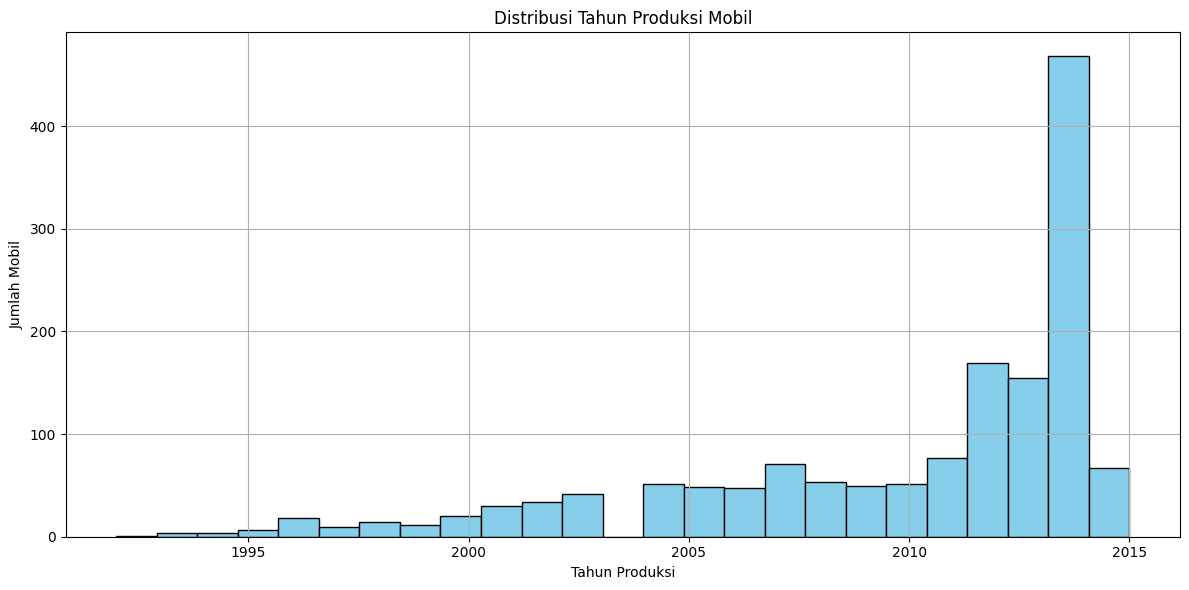

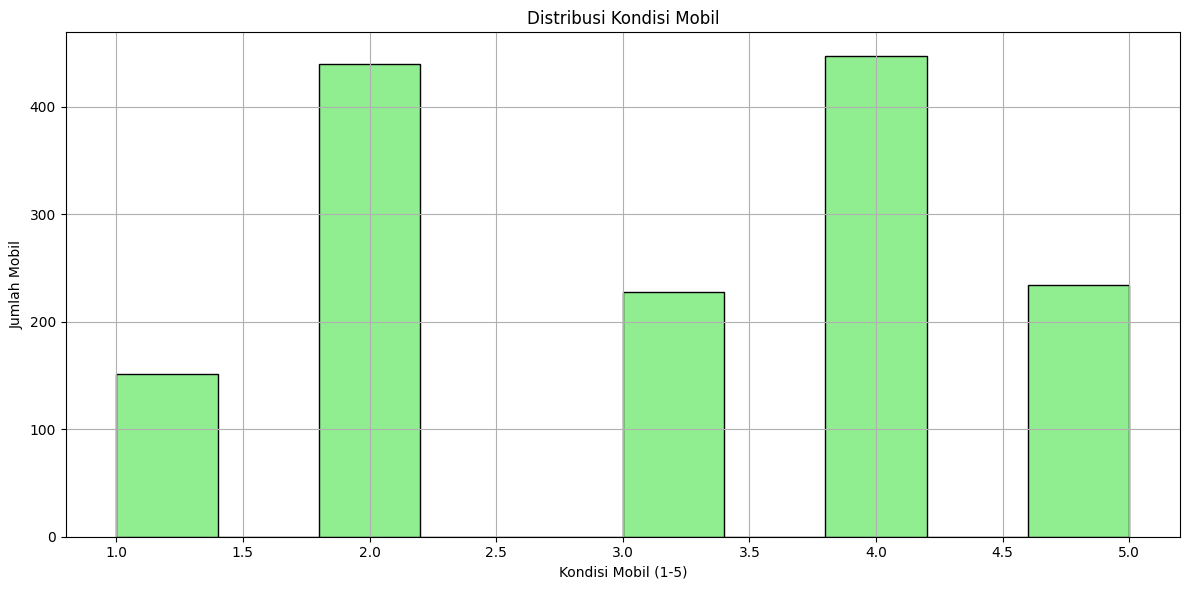

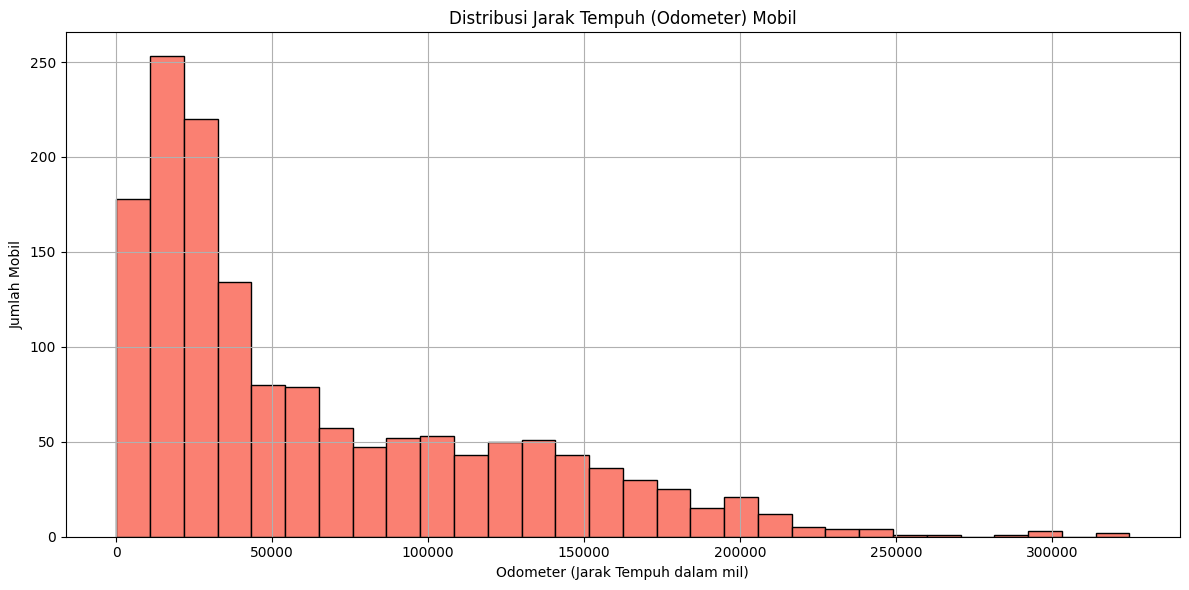

In [93]:
# Distribusi Tahun Produksi
fig_year = plt.figure(figsize=(12, 6))
plt.hist(df['year'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Tahun Produksi')
plt.ylabel('Jumlah Mobil')
plt.title('Distribusi Tahun Produksi Mobil')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribusi Kondisi Mobil
fig_condition = plt.figure(figsize=(12, 6))
plt.hist(df['condition'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Kondisi Mobil (1-5)')
plt.ylabel('Jumlah Mobil')
plt.title('Distribusi Kondisi Mobil')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribusi Odometer Mobil
fig_odometer = plt.figure(figsize=(12, 6))
plt.hist(df['odometer'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Odometer (Jarak Tempuh dalam mil)')
plt.ylabel('Jumlah Mobil')
plt.title('Distribusi Jarak Tempuh (Odometer) Mobil')
plt.grid(True)
plt.tight_layout()
plt.show()

In [94]:
# YEAR
minYear = df['year'].min()
maxYear = df['year'].max()
meanYear = df['year'].mean()

print(f"Min Year: {minYear}")
print(f"Max Year: {maxYear}")
print(f"Mean Year: {meanYear:.2f}")

# CONDITION
minCondition = df['condition'].min()
maxCondition = df['condition'].max()
meanCondition = df['condition'].mean()

print(f"Min Condition: {minCondition}")
print(f"Max Condition: {maxCondition}")
print(f"Mean Condition: {meanCondition:.2f}")

# ODOMETER
minOdometer = df['odometer'].min()
maxOdometer = df['odometer'].max()
meanOdometer = df['odometer'].mean()

print(f"Min Odometer: {minOdometer}")
print(f"Max Odometer: {maxOdometer}")
print(f"Mean Odometer: {meanOdometer:.2f}")

Min Year: 1992
Max Year: 2015
Mean Year: 2010.02
Min Condition: 1.0
Max Condition: 5.0
Mean Condition: 3.12
Min Odometer: 1.0
Max Odometer: 324848.0
Mean Odometer: 64727.93


In [95]:
#year
def year_tua(year):
    if year <= 1995:
        return 1
    elif 1995 < year <= 2005:
        return (2005 - year) / (2005 - 1995)
    else:
        return 0

def year_sedang(year):
    if year <= 2000 or year >= 2015:
        return 0
    elif 2000 < year <= 2008:
        return (year - 2000) / (2008 - 2000)
    elif 2008 < year < 2015:
        return (2015 - year) / (2015 - 2008)
    else:
        return 0

def year_baru(year):
    if year <= 2010:
        return 0
    elif 2010 < year <= 2020:
        return (year - 2010) / (2020 - 2010)
    else:
        return 1

def condition_buruk(cond):
    if cond <= 1.0:
        return 1
    elif 1.0 < cond <= 2.5:
        return (2.5 - cond) / (2.5 - 1.0)
    else:
        return 0

#condition
def condition_sedang(cond):
    if cond <= 2 or cond >= 4:
        return 0
    elif 2 < cond <= 3:
        return (cond - 2) / (3 - 2)
    elif 3 < cond < 4:
        return (4 - cond) / (4 - 3)
    else:
        return 0

def condition_baik(cond):
    if cond <= 3.5:
        return 0
    elif 3.5 < cond <= 5.0:
        return (cond - 3.5) / (5.0 - 3.5)
    else:
        return 1

#odometer
def odometer_rendah(km):
    if km <= 0:
        return 1
    elif 0 < km <= 50000:
        return (50000 - km) / 50000
    else:
        return 0

def odometer_sedang(km):
    if km <= 30000 or km >= 170000:
        return 0
    elif 30000 < km <= 100000:
        return (km - 30000) / (100000 - 30000)
    elif 100000 < km < 170000:
        return (170000 - km) / (170000 - 100000)
    else:
        return 0

def odometer_tinggi(km):
    if km <= 150000:
        return 0
    elif 150000 < km <= 300000:
        return (km - 150000) / (300000 - 150000)
    else:
        return 1

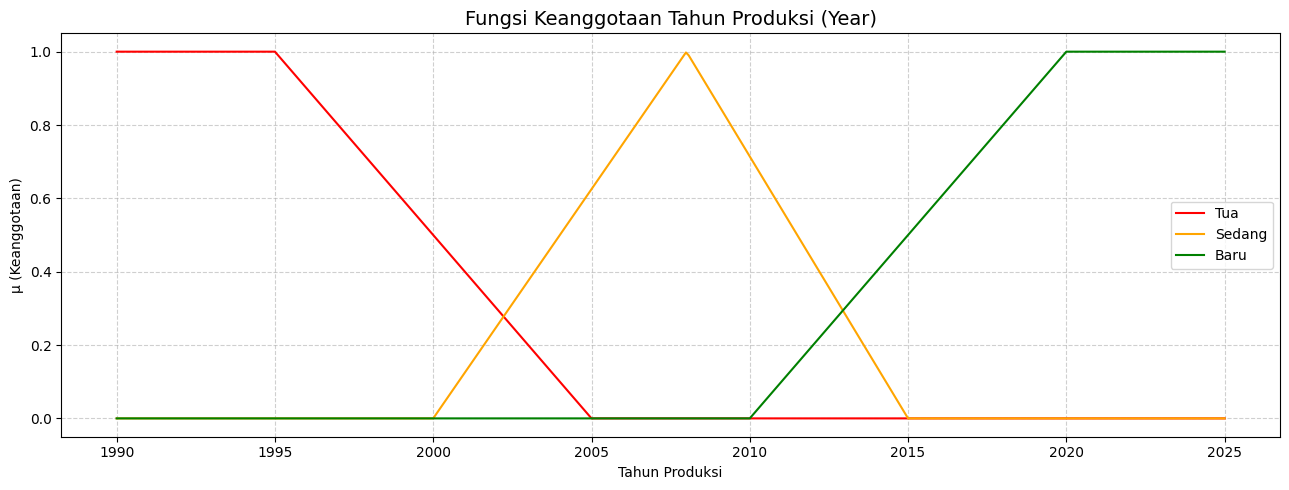

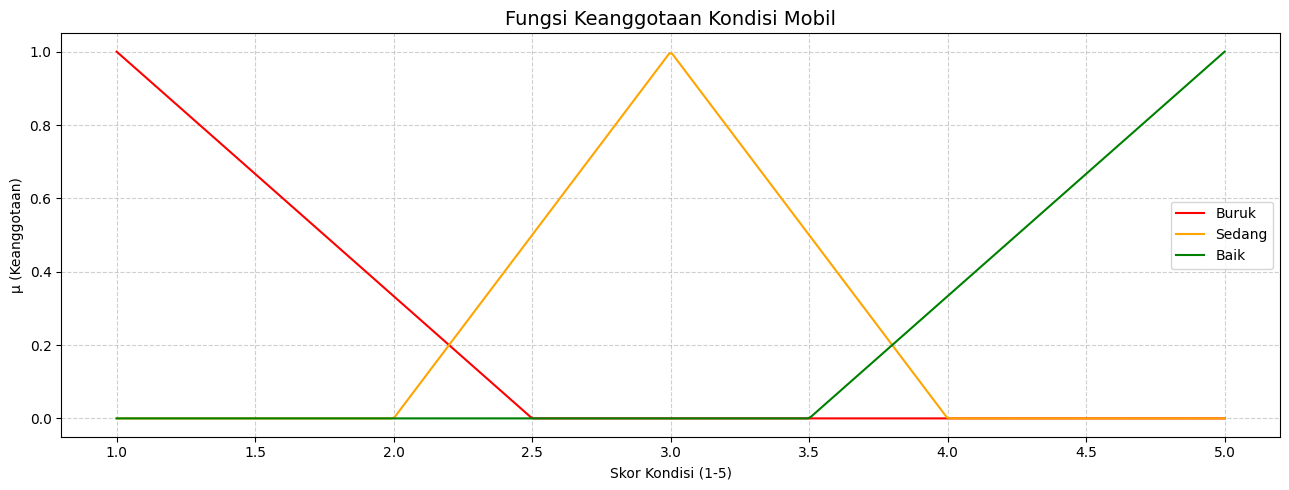

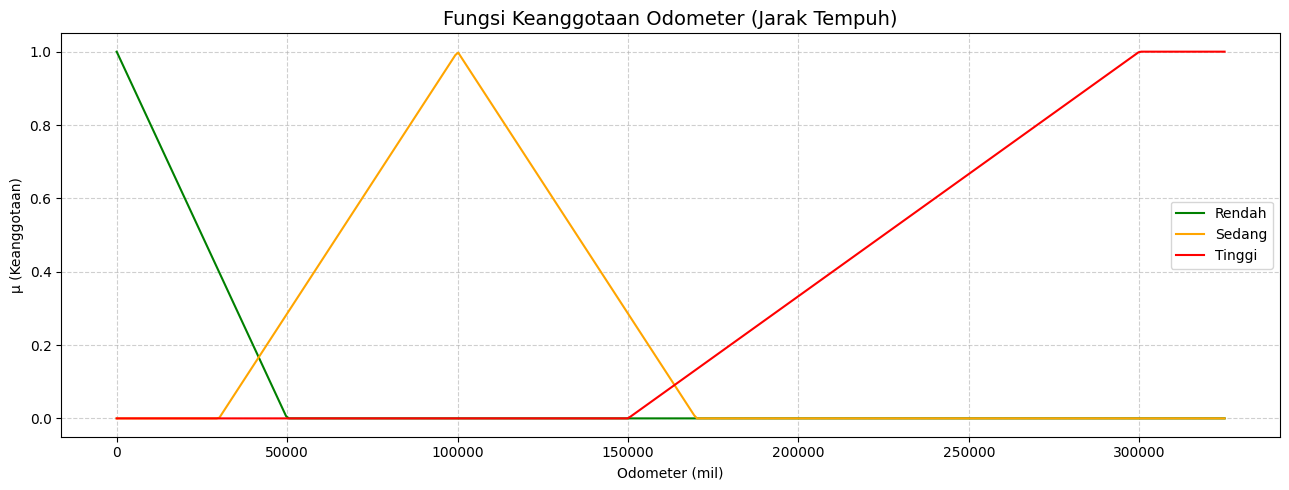

In [96]:
# YEAR
year_range = np.linspace(1990, 2025, 400)
anggota_year_tua = [year_tua(y) for y in year_range]
anggota_year_sedang = [year_sedang(y) for y in year_range]
anggota_year_baru = [year_baru(y) for y in year_range]

plt.figure(figsize=(13, 5))
plt.plot(year_range, anggota_year_tua, label='Tua', color='red')
plt.plot(year_range, anggota_year_sedang, label='Sedang', color='orange')
plt.plot(year_range, anggota_year_baru, label='Baru', color='green')
plt.title('Fungsi Keanggotaan Tahun Produksi (Year)', fontsize=14)
plt.xlabel('Tahun Produksi')
plt.ylabel('μ (Keanggotaan)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# CONDITION
condition_range = np.linspace(1.0, 5.0, 400)
anggota_condition_buruk = [condition_buruk(c) for c in condition_range]
anggota_condition_sedang = [condition_sedang(c) for c in condition_range]
anggota_condition_baik = [condition_baik(c) for c in condition_range]

plt.figure(figsize=(13, 5))
plt.plot(condition_range, anggota_condition_buruk, label='Buruk', color='red')
plt.plot(condition_range, anggota_condition_sedang, label='Sedang', color='orange')
plt.plot(condition_range, anggota_condition_baik, label='Baik', color='green')
plt.title('Fungsi Keanggotaan Kondisi Mobil', fontsize=14)
plt.xlabel('Skor Kondisi (1-5)')
plt.ylabel('μ (Keanggotaan)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ODOMETER
odometer_range = np.linspace(0, 325000, 400)
anggota_odometer_rendah = [odometer_rendah(o) for o in odometer_range]
anggota_odometer_sedang = [odometer_sedang(o) for o in odometer_range]
anggota_odometer_tinggi = [odometer_tinggi(o) for o in odometer_range]

plt.figure(figsize=(13, 5))
plt.plot(odometer_range, anggota_odometer_rendah, label='Rendah', color='green')
plt.plot(odometer_range, anggota_odometer_sedang, label='Sedang', color='orange')
plt.plot(odometer_range, anggota_odometer_tinggi, label='Tinggi', color='red')
plt.title('Fungsi Keanggotaan Odometer (Jarak Tempuh)', fontsize=14)
plt.xlabel('Odometer (mil)')
plt.ylabel('μ (Keanggotaan)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

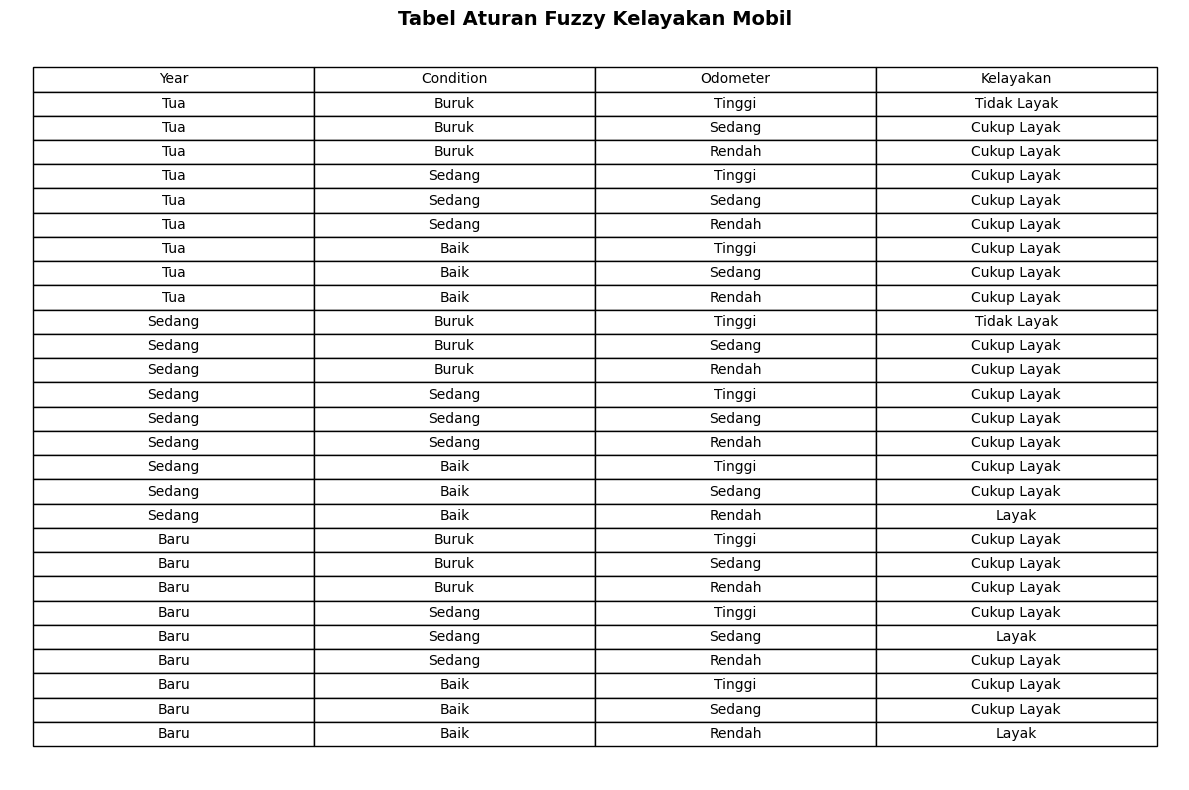

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi fuzzy prediksi kelayakan berdasarkan rule base
def prediksi_kelayakan(year, condition, odo):
    # HIGH PRIORITY RULES
    if year == "Tua" and condition == "Buruk" and odo == "Tinggi":
        return "Tidak Layak"
    if year == "Sedang" and condition == "Buruk" and odo == "Tinggi":
        return "Tidak Layak"
    
    if year == "Tua" and condition == "Sedang" and odo == "Sedang":
        return "Cukup Layak"
    if year == "Tua" and condition == "Baik" and odo == "Rendah":
        return "Cukup Layak"
    if year == "Sedang" and condition == "Sedang" and odo == "Sedang":
        return "Cukup Layak"
    if year == "Baru" and condition == "Baik" and odo == "Tinggi":
        return "Cukup Layak"
    if year == "Sedang" and condition == "Baik" and odo == "Tinggi":
        return "Cukup Layak"

    if year == "Baru" and condition == "Baik" and odo == "Rendah":
        return "Layak"
    if year == "Baru" and condition == "Sedang" and odo == "Sedang":
        return "Layak"
    if year == "Sedang" and condition == "Baik" and odo == "Rendah":
        return "Layak"

    # Default fallback
    return "Cukup Layak"

# Daftar kategori
year_list = ["Tua", "Sedang", "Baru"]
condition_list = ["Buruk", "Sedang", "Baik"]
odometer_list = ["Tinggi", "Sedang", "Rendah"]

# Generate aturan kombinasi semua
rules = []
for year in year_list:
    for cond in condition_list:
        for odo in odometer_list:
            rules.append({
                "Year": year,
                "Condition": cond,
                "Odometer": odo,
                "Kelayakan": prediksi_kelayakan(year, cond, odo)
            })

df_rules = pd.DataFrame(rules)

# Visualisasi tabel aturan fuzzy
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

cell_text = df_rules.values.tolist()
col_labels = df_rules.columns.tolist()

tbl = ax.table(
    cellText=cell_text,
    colLabels=col_labels,
    loc='center',
    cellLoc='center',
    colWidths=[0.2] * len(col_labels)
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.title('Tabel Aturan Fuzzy Kelayakan Mobil', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [98]:
# Output: Tidak Layak
def output_tidak_layak(x):
    if x <= 20:
        return 1
    elif 20 < x <= 40:
        return (40 - x) / (40 - 20)
    else:
        return 0

# Output: Cukup Layak
def output_cukup_layak(x):
    if x <= 30 or x >= 70:
        return 0
    elif 30 < x <= 50:
        return (x - 30) / (50 - 30)
    elif 50 < x < 70:
        return (70 - x) / (70 - 50)
    else:
        return 0

# Output: Layak
def output_layak(x):
    if x <= 60:
        return 0
    elif 60 < x <= 80:
        return (x - 60) / (80 - 60)
    elif 80 < x <= 100:
        return 1
    else:
        return 0

In [99]:
def fuzzy_inference(year_val, condition_val, odometer_val):
    # Derajat keanggotaan input YEAR
    year_degrees = {
        "Tua": year_tua(year_val),
        "Sedang": year_sedang(year_val),
        "Baru": year_baru(year_val)
    }

    # Derajat keanggotaan input CONDITION
    condition_degrees = {
        "Buruk": condition_buruk(condition_val),
        "Sedang": condition_sedang(condition_val),
        "Baik": condition_baik(condition_val)
    }

    # Derajat keanggotaan input ODOMETER
    odometer_degrees = {
        "Tinggi": odometer_tinggi(odometer_val),
        "Sedang": odometer_sedang(odometer_val),
        "Rendah": odometer_rendah(odometer_val)
    }

    # Output fuzzy labels
    output_labels = ["Tidak Layak", "Cukup Layak", "Layak"]
    result = {label: 0 for label in output_labels}

    # RULE BASE: 27 kombinasi lengkap
    rules = [
        ("Tua", "Buruk", "Tinggi", "Tidak Layak"),
        ("Tua", "Buruk", "Sedang", "Cukup Layak"),
        ("Tua", "Buruk", "Rendah", "Cukup Layak"),
        ("Tua", "Sedang", "Tinggi", "Cukup Layak"),
        ("Tua", "Sedang", "Sedang", "Cukup Layak"),
        ("Tua", "Sedang", "Rendah", "Cukup Layak"),
        ("Tua", "Baik", "Tinggi", "Cukup Layak"),
        ("Tua", "Baik", "Sedang", "Cukup Layak"),
        ("Tua", "Baik", "Rendah", "Cukup Layak"),

        ("Sedang", "Buruk", "Tinggi", "Tidak Layak"),
        ("Sedang", "Buruk", "Sedang", "Cukup Layak"),
        ("Sedang", "Buruk", "Rendah", "Cukup Layak"),
        ("Sedang", "Sedang", "Tinggi", "Cukup Layak"),
        ("Sedang", "Sedang", "Sedang", "Cukup Layak"),
        ("Sedang", "Sedang", "Rendah", "Cukup Layak"),
        ("Sedang", "Baik", "Tinggi", "Cukup Layak"),
        ("Sedang", "Baik", "Sedang", "Cukup Layak"),
        ("Sedang", "Baik", "Rendah", "Layak"),

        ("Baru", "Buruk", "Tinggi", "Cukup Layak"),
        ("Baru", "Buruk", "Sedang", "Cukup Layak"),
        ("Baru", "Buruk", "Rendah", "Cukup Layak"),
        ("Baru", "Sedang", "Tinggi", "Cukup Layak"),
        ("Baru", "Sedang", "Sedang", "Layak"),
        ("Baru", "Sedang", "Rendah", "Cukup Layak"),
        ("Baru", "Baik", "Tinggi", "Cukup Layak"),
        ("Baru", "Baik", "Sedang", "Cukup Layak"),
        ("Baru", "Baik", "Rendah", "Layak"),
    ]

    # Evaluasi semua rule
    for yr, cond, odo, output in rules:
        μ = min(
            year_degrees[yr],
            condition_degrees[cond],
            odometer_degrees[odo]
        )
        result[output] = max(result[output], μ)

    return result

In [100]:
def defuzzifikasi(hasil):
    x = np.linspace(0, 100, 500)
    numerator = 0
    denominator = 0

    for xi in x:
        μ = max(
            min(hasil["Tidak Layak"], output_tidak_layak(xi)),
            min(hasil["Cukup Layak"], output_cukup_layak(xi)),
            min(hasil["Layak"], output_layak(xi))
        )
        numerator += xi * μ
        denominator += μ

    return numerator / denominator if denominator != 0 else 0

<span style="font-weight:bold; font-size:28px">Fuzzy Mamdani</span>

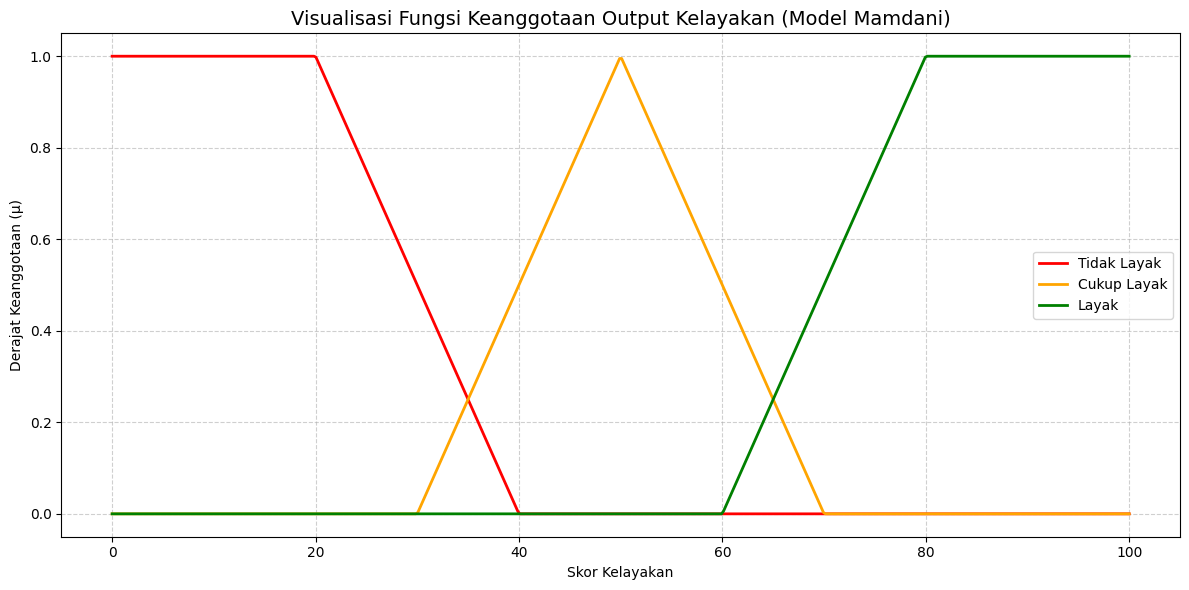

In [101]:
# Rentang nilai output fuzzy
x = np.linspace(0, 100, 500)

# Hitung keanggotaan masing-masing kategori output
y_tidak_layak = [output_tidak_layak(val) for val in x]
y_cukup_layak = [output_cukup_layak(val) for val in x]
y_layak = [output_layak(val) for val in x]

# Plot semua fungsi keanggotaan output
plt.figure(figsize=(12, 6))
plt.plot(x, y_tidak_layak, label="Tidak Layak", color="red", linewidth=2)
plt.plot(x, y_cukup_layak, label="Cukup Layak", color="orange", linewidth=2)
plt.plot(x, y_layak, label="Layak", color="green", linewidth=2)

plt.title("Visualisasi Fungsi Keanggotaan Output Kelayakan (Model Mamdani)", fontsize=14)
plt.xlabel("Skor Kelayakan")
plt.ylabel("Derajat Keanggotaan (μ)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [102]:
def interpretasi_kelayakan(skor):
    μ_tidak = output_tidak_layak(skor)
    μ_cukup = output_cukup_layak(skor)
    μ_layak = output_layak(skor)

    max_μ = max(μ_tidak, μ_cukup, μ_layak)
    if max_μ == μ_tidak:
        return "Tidak Layak"
    elif max_μ == μ_cukup:
        return "Cukup Layak"
    else:
        return "Layak"

In [103]:
def classify_kelayakan(row):
    hasil_inferensi = fuzzy_inference(row['year'], row['condition'], row['odometer'])
    return defuzzifikasi(hasil_inferensi)

# Hitung skor fuzzy Mamdani
df['Model Mamdani'] = df.apply(classify_kelayakan, axis=1)

# Konversi skor jadi kategori fuzzy (layak/cukup/tidak)
df['Kategori Kelayakan Mamdani'] = df['Model Mamdani'].apply(interpretasi_kelayakan)

# Tampilkan kolom penting
df[['year', 'condition', 'odometer', 'Model Mamdani', 'Kategori Kelayakan Mamdani']].head(15)

,year,condition,odometer,Model Mamdani,Kategori Kelayakan Mamdani
0,2011,3.0,64680.0,55.962515,Cukup Layak
1,2011,4.0,14505.0,81.666293,Layak
2,2014,5.0,20738.0,81.976123,Layak
3,2006,3.0,133320.0,50.000000,Cukup Layak
4,2005,2.0,137046.0,50.000000,Cukup Layak
5,2006,2.0,125744.0,50.000000,Cukup Layak
6,2011,2.0,45861.0,50.000000,Cukup Layak
7,2004,2.0,125211.0,50.000000,Cukup Layak
8,2012,2.0,59224.0,50.000000,Cukup Layak
9,2003,1.0,1.0,50.000000,Cukup Layak


<span style="font-weight:bold; font-size:28px">Fuzzy Sugeno</span>

In [104]:
def anggota_tidak_layak_sugeno(x):
    return 1 if x == 20 else 0

def anggota_cukup_layak_sugeno(x):
    return 1 if x == 50 else 0

def anggota_layak_sugeno(x):
    return 1 if x == 80 else 0

In [105]:
# Rentang output kelayakan
kelayakan_range = np.arange(0, 100, 0.1)
tidak_layak_ = [anggota_tidak_layak_sugeno(x) for x in kelayakan_range]
cukup_layak_ = [anggota_cukup_layak_sugeno(x) for x in kelayakan_range]
layak_ = [anggota_layak_sugeno(x) for x in kelayakan_range]

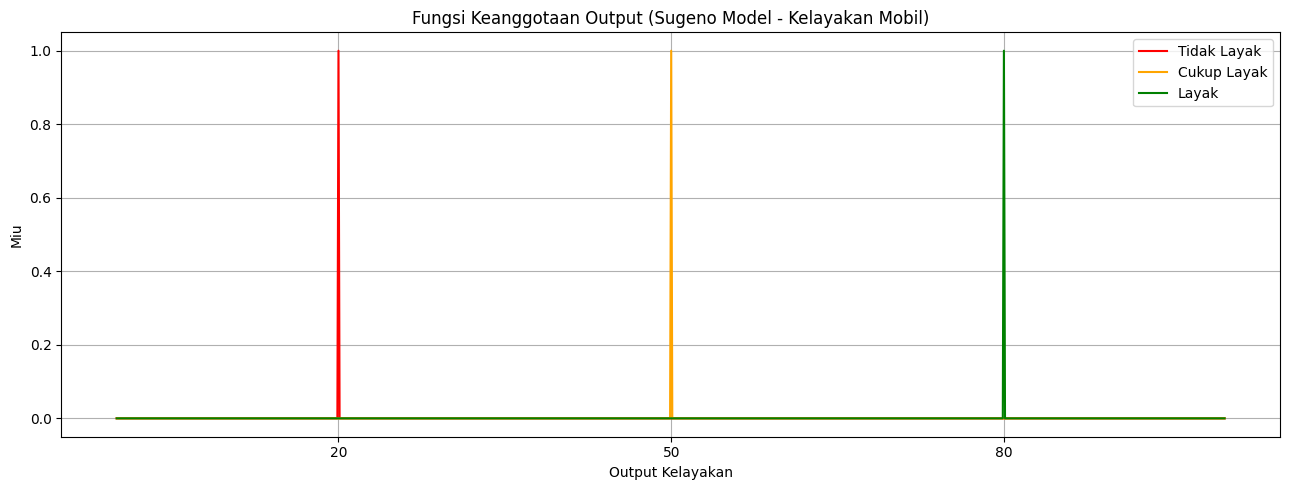

In [106]:
# Visualisasi
plt.figure(figsize=(13, 5))
plt.plot(kelayakan_range, tidak_layak_, label='Tidak Layak', color='red')
plt.plot(kelayakan_range, cukup_layak_, label='Cukup Layak', color='orange')
plt.plot(kelayakan_range, layak_, label='Layak', color='green')

plt.title('Fungsi Keanggotaan Output (Sugeno Model - Kelayakan Mobil)')
plt.xlabel('Output Kelayakan')
plt.xticks([20, 50, 80])
plt.ylabel('Miu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
# Fungsi untuk menghitung weighted average Sugeno
def weighted_average_sugeno(fuzzy_sets):
    total = sum(fuzzy_sets.values())
    if total == 0:
        return 0  # fallback
    return (fuzzy_sets['Tidak Layak'] * 20 +
            fuzzy_sets['Cukup Layak'] * 50 +
            fuzzy_sets['Layak'] * 80) / total

In [108]:
# Prediksi berdasarkan input fuzzy
def prediksi_dengan_model_sugeno_mobil(year, condition, odometer):
    fuzzy_sets = fuzzy_inference(year, condition, odometer)
    return weighted_average_sugeno(fuzzy_sets)

In [109]:
# Terapkan ke dataframe
def classify_kelayakan_sugeno(row):
    return prediksi_dengan_model_sugeno_mobil(
        row['year'], row['condition'], row['odometer']
    )

df['Model Sugeno'] = df.apply(classify_kelayakan_sugeno, axis=1)

In [110]:
# Mapping kategori berdasarkan skor Sugeno (angka fix versi kamu)
def kategori_kelayakan_sugeno(nilai):
    kategori_map = {
        'Tidak Layak': 20,
        'Cukup Layak': 50,
        'Layak': 80
    }
    return min(kategori_map, key=lambda k: abs(nilai - kategori_map[k]))

# Buat kolom kategori Sugeno berdasarkan skor output
df['Kategori Kelayakan Sugeno'] = df['Model Sugeno'].apply(kategori_kelayakan_sugeno)

# Tampilkan 20 data terakhir untuk melihat perbandingan model
display_cols = [
    'year', 'condition', 'odometer',
    'Model Mamdani', 'Kategori Kelayakan Mamdani',
    'Model Sugeno', 'Kategori Kelayakan Sugeno'
]

# Cetak dataframe langsung di Jupyter (gak pakai ace_tools)
df[display_cols].head(15)

,year,condition,odometer,Model Mamdani,Kategori Kelayakan Mamdani,Model Sugeno,Kategori Kelayakan Sugeno
0,2011,3.0,64680.0,55.962515,Cukup Layak,55.038388,Cukup Layak
1,2011,4.0,14505.0,81.666293,Layak,80.000000,Layak
2,2014,5.0,20738.0,81.976123,Layak,80.000000,Layak
3,2006,3.0,133320.0,50.000000,Cukup Layak,50.000000,Cukup Layak
4,2005,2.0,137046.0,50.000000,Cukup Layak,50.000000,Cukup Layak
5,2006,2.0,125744.0,50.000000,Cukup Layak,50.000000,Cukup Layak
6,2011,2.0,45861.0,50.000000,Cukup Layak,50.000000,Cukup Layak
7,2004,2.0,125211.0,50.000000,Cukup Layak,50.000000,Cukup Layak
8,2012,2.0,59224.0,50.000000,Cukup Layak,50.000000,Cukup Layak
9,2003,1.0,1.0,50.000000,Cukup Layak,50.000000,Cukup Layak


<span style="font-weight:bold; font-size:28px">Akurasi Kelayakan</span>

In [111]:
# Asumsi: bikin label kelayakan manual dari sellingprice
def buat_label_kelayakan(row):
    if row['sellingprice'] > 15000:
        return 'layak'
    elif row['sellingprice'] > 8000:
        return 'cukup layak'
    else:
        return 'tidak layak'

df['kelayakan_aktual'] = df.apply(buat_label_kelayakan, axis=1)

In [112]:
kelayakan_ke_angka = {
    'tidak layak': 20,
    'cukup layak': 50,
    'layak': 80
}

# Mapping kategori ke angka
df['kelayakan_aktual'] = df['kelayakan_aktual'].str.lower().map(kelayakan_ke_angka)
df['pred_mamdani_num'] = df['Kategori Kelayakan Mamdani'].str.lower().map(kelayakan_ke_angka)
df['pred_sugeno_num'] = df['Kategori Kelayakan Sugeno'].str.lower().map(kelayakan_ke_angka)

# Fungsi SMAPE
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0
    return np.mean(diff) * 100

# Hitung SMAPE untuk Sugeno
df_valid_sugeno = df.dropna(subset=['kelayakan_aktual', 'pred_sugeno_num'])
nilai_smape_sugeno = smape(df_valid_sugeno['kelayakan_aktual'], df_valid_sugeno['pred_sugeno_num'])

# Hitung SMAPE untuk Mamdani
df_valid_mamdani = df.dropna(subset=['kelayakan_aktual', 'pred_mamdani_num'])
nilai_smape_mamdani = smape(df_valid_mamdani['kelayakan_aktual'], df_valid_mamdani['pred_mamdani_num'])

# Cetak hasil
print(f"SMAPE Model Sugeno: {nilai_smape_sugeno:.2f}%")
print(f"SMAPE Model Mamdani: {nilai_smape_mamdani:.2f}%")

SMAPE Model Sugeno: 35.05%
SMAPE Model Mamdani: 35.23%


In [113]:
def mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

print(f"Mean Absolute Error Mamdani: {mae(df['kelayakan_aktual'], df['pred_mamdani_num']):.2f}")
print(f"Mean Absolute Error Sugeno: {mae(df['kelayakan_aktual'], df['pred_sugeno_num']):.2f}")

Mean Absolute Error Mamdani: 15.52
Mean Absolute Error Sugeno: 15.40


<span style="font-weight:bold; font-size:28px">Perbandingan dengan Machine Learning</span>

In [114]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

In [115]:
# Pastikan kolom kelayakan_aktual tidak null
df = df.dropna(subset=['kelayakan_aktual'])

# Encode label target (Layak, Cukup Layak, Tidak Layak)
label_encoder = LabelEncoder()
df['kelayakan_encoded'] = label_encoder.fit_transform(df['kelayakan_aktual'].astype(str).str.lower())

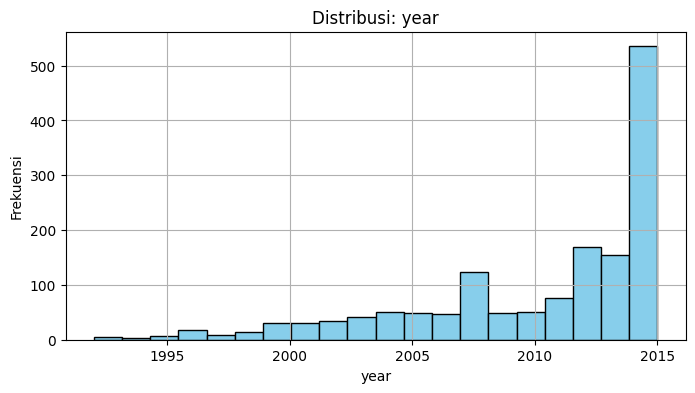

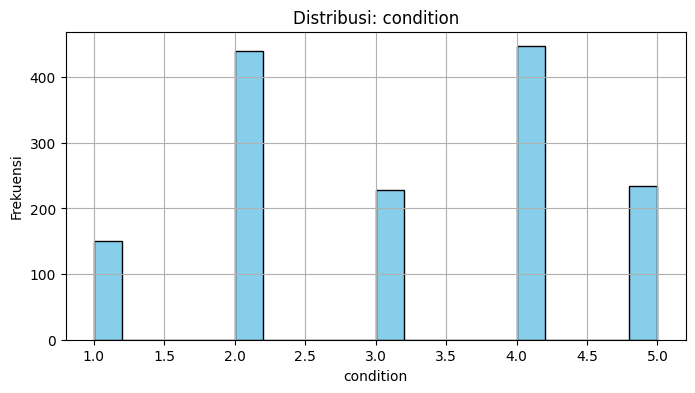

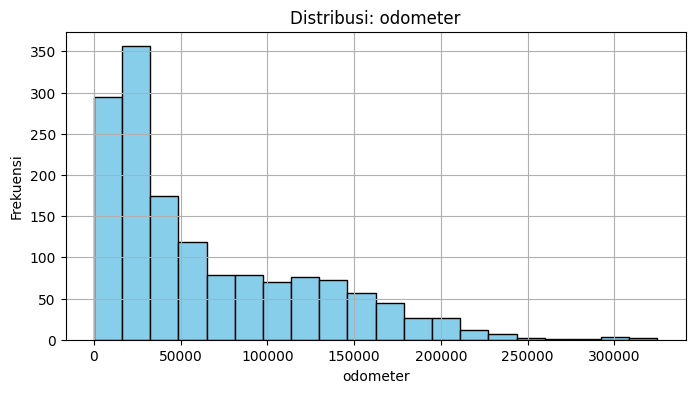

In [116]:
# Visualisasi distribusi kolom numerik
num_cols = ['year', 'condition', 'odometer']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()

In [119]:
X = df[['year', 'condition', 'odometer']]
y = df['kelayakan_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

ImportError: sklearn needs to be installed in order to use this module

In [121]:
y_pred = model.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)

print(f"Akurasi XGBoost: {akurasi*100:.2f}%")

NameError: name 'model' is not defined